In [1]:
%matplotlib inline
import hyperspy.api as hs
import numpy as np
import matplotlib.pyplot as plt
import atomap.api as am

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from model.models import *
from utils.utils import *

Decomposition info:
  normalize_poissonian_noise=False
  algorithm=SVD
  output_dimension=None
  centre=None
======Quantitative Information======
W : 905
V : 65
Se2 : 930
Se Single Vacancy : 32
Se Double Vacancy : 2


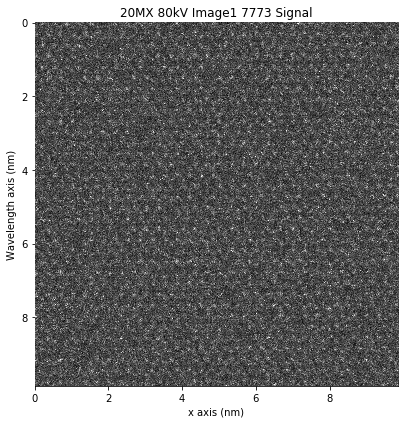

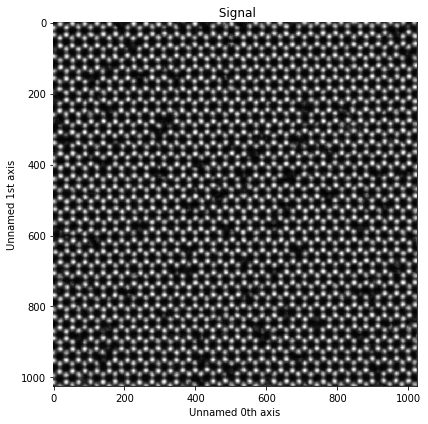

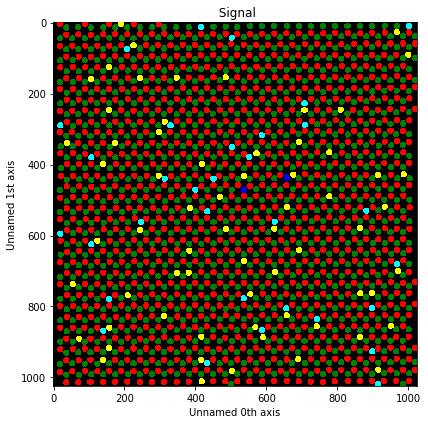

In [2]:
#write IMAGE_DIR & MATERIAL and run the cell!
IMAGE_DIR = 'example/V-WSe2/20MX 80kV Image1 7773.dm4' # Please confirm the example folder
MATERIAL = 'V-WSe2' # 'V-WSe2'


#============================DEEP NEURAL NETWORK MODEL CALCULATION=======================================

DEVICE = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')

input_img = hs.load(IMAGE_DIR)
input_arr = image_preprocessing(input_img, device = DEVICE)

denoising_net, peak_net, class_net = load_trained_model(material = MATERIAL,
                                                        device = DEVICE)
denoised_sig, mapping_sig, quantitative_result = run_model(input_arr, denoising_net, peak_net, class_net)



input_img.plot(scalebar = False, colorbar = False)
denoised_sig.plot(scalebar = False, colorbar = False)

mapping_sig.plot(scalebar = False, colorbar = False)

print_quantitative_information(quantitative_result, MATERIAL)